**Import Libraries**

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Downloading the Data**

In [3]:
tickers=["MSFT", "AAPL", "AMZN", "GOOG", "JPM", "BAC", "V", "MA", "JNJ", "PFE", "UNH", "CVS", "PG", "KO", "PEP", "WMT", "XOM", "CVX","BA", "MMM"]
stocks=yf.download(tickers,start="2019-01-01",end="2022-01-01")

[*********************100%%**********************]  20 of 20 completed


**Visualizing their Performance through Graph for a rough idea**

*Normalising the close values of the stocks for the given time period, it becomes easier to estimate the stock which has given better returns*

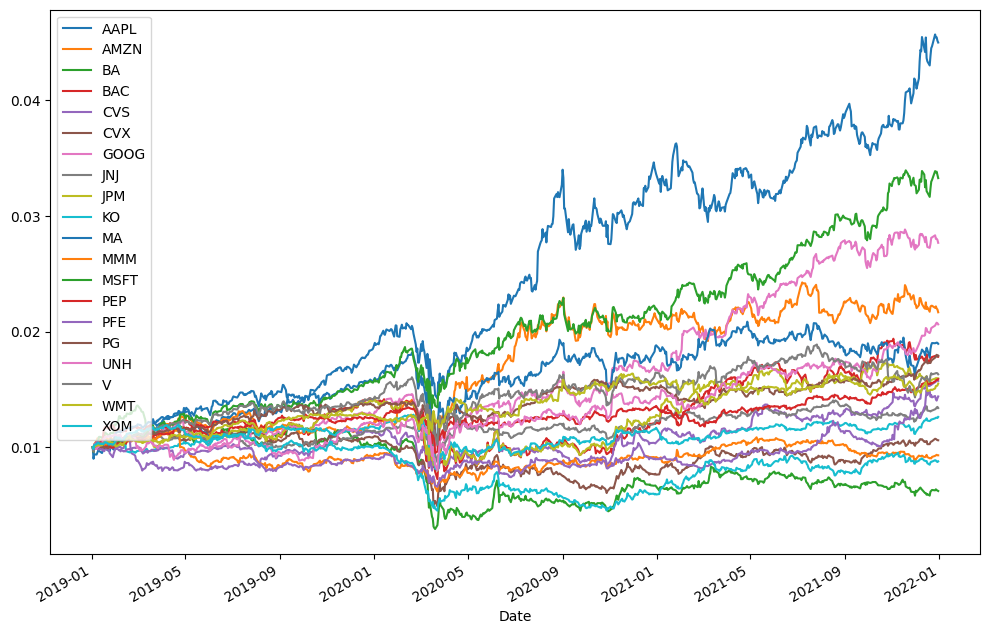

In [6]:
close=stocks.loc[:,"Close"].copy()
normclose=close.div(close.iloc[0].mul(100))
normclose.plot(figsize=(12,8))
plt.legend(loc="upper left")
plt.show()

*Look for stocks with a consistent upward trend in their closing prices over time. Avoid stocks with erratic fluctuations or a downward trend.
Identify stocks with steady growth rather than sudden spikes.*

**Risk Vs Reward Potential**

In [ ]:
ret=close.pct_change().dropna()

In [ ]:
summary=ret.describe().T.loc[:,["mean","std"]]

In [ ]:
summary['mean']=summary['mean']*252
summary['std']=summary['std']*np.sqrt(252)
summary

,mean,std
Ticker,,
AAPL,0.559990,0.341346
AMZN,0.300859,0.293785
BA,0.004511,0.570960
BAC,0.269461,0.392658
CVS,0.195635,0.298410
CVX,0.098509,0.395397
GOOG,0.382941,0.295129
JNJ,0.120755,0.216545
JPM,0.218134,0.354561


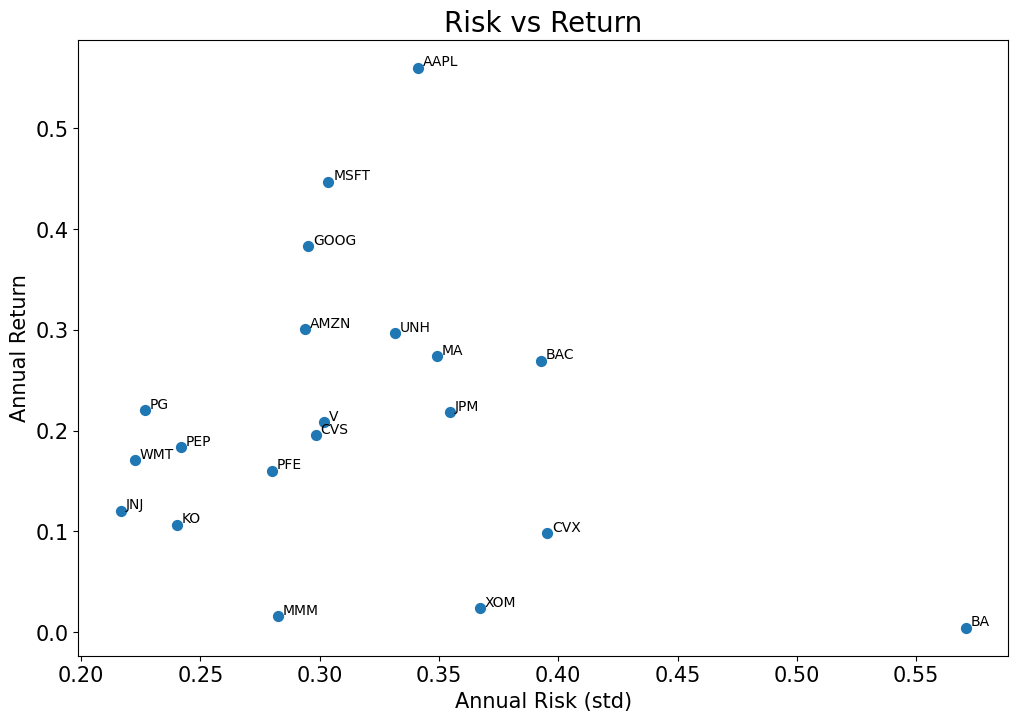

In [ ]:
summary.plot.scatter(x="std", y="mean", figsize=(12,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002))
plt.xlabel("Annual Risk (std)",fontsize=15)
plt.ylabel("Annual Return",fontsize=15)
plt.title("Risk vs Return",fontsize=20)
plt.show()

*Look for stocks that fall in the upper right quadrant of the plot, indicating a good balance between risk and return.*

**Covariance**

In [ ]:
ret.cov()

Ticker,AAPL,AMZN,BA,BAC,CVS,CVX,GOOG,JNJ,JPM,KO,MA,MMM,MSFT,PEP,PFE,PG,UNH,V,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,0.000462,0.000261,0.000310,0.000238,0.000147,0.000216,0.000267,0.000136,0.000215,0.000139,0.000278,0.000170,0.000318,0.000186,0.000128,0.000144,0.000222,0.000245,0.000127,0.000180
AMZN,0.000261,0.000342,0.000153,0.000112,0.000078,0.000091,0.000222,0.000079,0.000096,0.000071,0.000179,0.000082,0.000247,0.000118,0.000069,0.000092,0.000135,0.000149,0.000093,0.000088
BA,0.000310,0.000153,0.001294,0.000540,0.000246,0.000555,0.000276,0.000160,0.000517,0.000270,0.000452,0.000263,0.000278,0.000206,0.000181,0.000142,0.000302,0.000373,0.000081,0.000499
BAC,0.000238,0.000112,0.000540,0.000612,0.000246,0.000448,0.000223,0.000153,0.000516,0.000206,0.000337,0.000272,0.000227,0.000188,0.000160,0.000151,0.000269,0.000303,0.000108,0.000415
CVS,0.000147,0.000078,0.000246,0.000246,0.000353,0.000210,0.000128,0.000133,0.000218,0.000128,0.000156,0.000153,0.000149,0.000145,0.000139,0.000127,0.000233,0.000156,0.000116,0.000192
CVX,0.000216,0.000091,0.000555,0.000448,0.000210,0.000620,0.000216,0.000154,0.000413,0.000202,0.000334,0.000235,0.000218,0.000174,0.000147,0.000123,0.000284,0.000305,0.000076,0.000488
GOOG,0.000267,0.000222,0.000276,0.000223,0.000128,0.000216,0.000346,0.000114,0.000201,0.000133,0.000255,0.000135,0.000277,0.000153,0.000112,0.000121,0.000203,0.000227,0.000098,0.000188
JNJ,0.000136,0.000079,0.000160,0.000153,0.000133,0.000154,0.000114,0.000186,0.000138,0.000117,0.000150,0.000127,0.000140,0.000136,0.000130,0.000126,0.000158,0.000138,0.000091,0.000121
JPM,0.000215,0.000096,0.000517,0.000516,0.000218,0.000413,0.000201,0.000138,0.000499,0.000196,0.000313,0.000232,0.000208,0.000173,0.000152,0.000133,0.000246,0.000280,0.000093,0.000364


*High positive covariance suggests prices move in the same direction, reducing portfolio diversification.
Aim for stocks with low or negative covariance to spread your risk and benefit from potential diversification gains.*

**Correlation**

In [ ]:
ret.corr()

Ticker,AAPL,AMZN,BA,BAC,CVS,CVX,GOOG,JNJ,JPM,KO,MA,MMM,MSFT,PEP,PFE,PG,UNH,V,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.655401,0.400390,0.447054,0.364446,0.403967,0.668536,0.464293,0.447823,0.428488,0.587600,0.444215,0.773058,0.567221,0.338303,0.469099,0.494433,0.599337,0.420832,0.361034
AMZN,0.655401,1.000000,0.229280,0.244665,0.223636,0.196918,0.643842,0.311707,0.233013,0.255166,0.440207,0.248843,0.698481,0.418200,0.210803,0.349650,0.349773,0.422819,0.356790,0.204822
BA,0.400390,0.229280,1.000000,0.606418,0.363918,0.618991,0.413241,0.325942,0.643045,0.497201,0.571303,0.411629,0.404183,0.375082,0.286100,0.276532,0.402284,0.545928,0.160151,0.600065
BAC,0.447054,0.244665,0.606418,1.000000,0.529577,0.727064,0.484306,0.452859,0.934285,0.550522,0.620250,0.617475,0.480878,0.497937,0.368149,0.427564,0.520293,0.643769,0.311288,0.725982
CVS,0.364446,0.223636,0.363918,0.529577,1.000000,0.448367,0.367447,0.520540,0.518954,0.449499,0.376304,0.458538,0.414721,0.506650,0.419957,0.474206,0.593427,0.438068,0.440702,0.441788
CVX,0.403967,0.196918,0.618991,0.727064,0.448367,1.000000,0.465592,0.454708,0.742325,0.535269,0.609346,0.530945,0.457439,0.457771,0.334721,0.345460,0.545303,0.644153,0.217921,0.847097
GOOG,0.668536,0.643842,0.413241,0.484306,0.367447,0.465592,1.000000,0.451327,0.482855,0.473815,0.624485,0.409812,0.778175,0.540914,0.342595,0.457366,0.521878,0.642659,0.375207,0.436928
JNJ,0.464293,0.311707,0.325942,0.452859,0.520540,0.454708,0.451327,1.000000,0.453983,0.568859,0.501530,0.522257,0.535881,0.654470,0.542571,0.648480,0.555961,0.533966,0.475441,0.382748
JPM,0.447823,0.233013,0.643045,0.934285,0.518954,0.742325,0.482855,0.453983,1.000000,0.580212,0.636608,0.585080,0.487679,0.508461,0.385993,0.418138,0.526426,0.658626,0.298244,0.704949


*aim for stocks with low correlation to other chosen stocks to create a more diversified portfolio.*

**HEATMAP TO VISUALIZE CORRELATION**

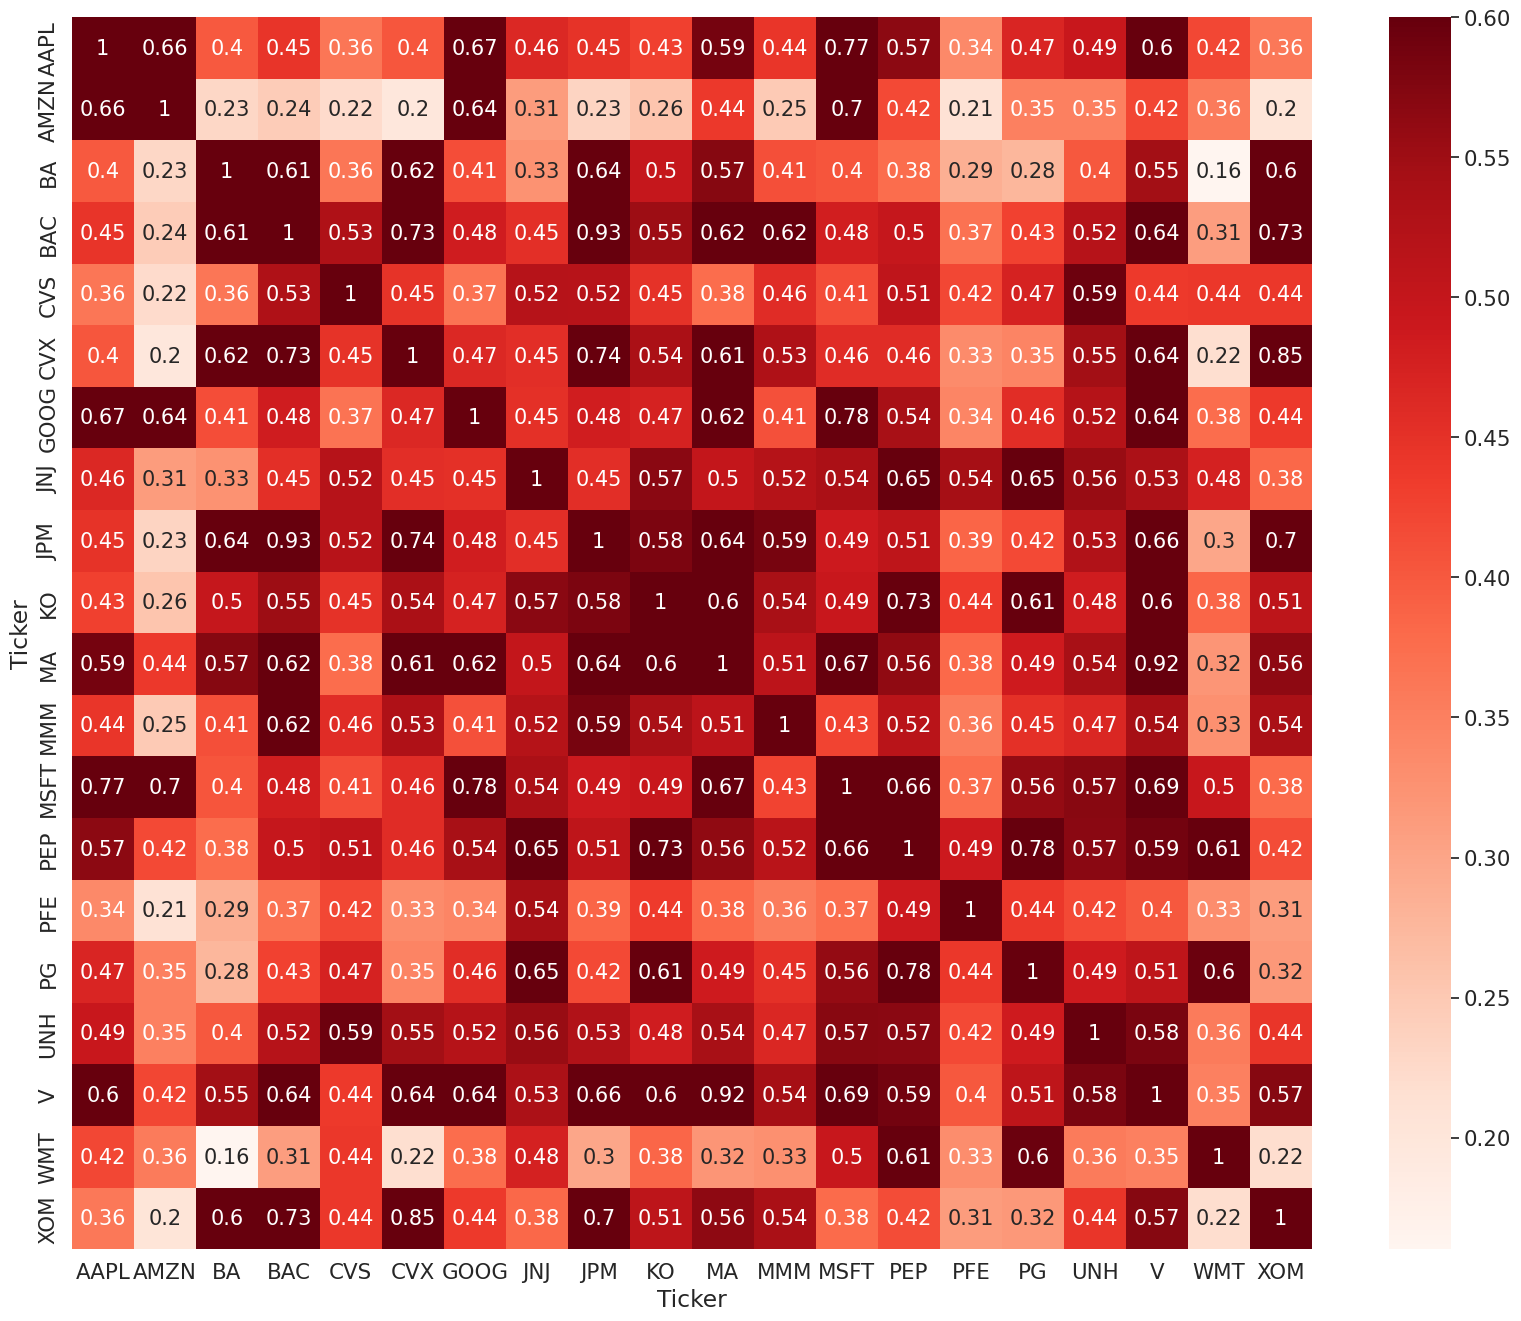

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15}, vmax=0.6)
plt.show()

*Darker shades of the heatmap refer to High Correlation Values.*